<a href="https://colab.research.google.com/github/GuilhermeDeAssis123/DataScience/blob/master/Projeto_Data_Science(Doen%C3%A7as_Cardiovasculares).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Análise exploratória de dados -  Doenças cardiovasculares.

> Doenças classificadas como cardiovasculares são aquelas de que alguma forma atacam o coração ou os vasos sanguinios. Dentro dessa classe podemos enumerar algumas como cardiopatia, arritimia cardíaca, aneurisma da orta, entre outras.

<center><img src = "https://drauziovarella.uol.com.br/wp-content/uploads/2012/01/20150519-coracao.jpg"></center>

> Apesar de ser uma das principais causas de morte no mundo, estima-se que cerca de 90% casos poderiam ter sido evitados que hábitos e estilo de vida mais saudável.

> Para ajudar na prevenção contra esses casos, hoje em dia existem muitos algoritmos de machine learning que conseguem prever e ajudar os medicos a identificarem essas doenças. Em alguns casos algoritmos de deep learning conseguiram prever doenças 5 anos antes delas se manifestarem.

> Podemos ver então que o uso da inteligência artificial é de grande impacto para à area da saúde e tem proporcionado aos profissionais da area ferramentas cada vez mais precisas.

#Obtenção dos Dados

>O principal Dataset utilizado nesse projeto foi retirado da **Cleveland Clinic Foundation** e se encontra disponível no [Repositório UCI *Machine Learning*](https://archive.ics.uci.edu/ml/datasets/heart+Disease). Ressalta-se que informações pessoais dos paciêntes como nome e documentos foram removidos do banco.

> O Dataset que possuimos é composto por 303 pessoas(linhas) e 76 atributos(colunas). Toda via os principais artigos e estudos optaram por apenas 14 desses atributos que são de maior relevância para análise, da mesma maneura que vamos fazer nesse projeto.

* O arquivo cvs com os dados de 303 pessoas e 14 atributos pode ser baixado [aqui](https://raw.githubusercontent.com/carlosfab/curso_data_science_na_pratica/master/modulo_03/heart-disease-uci.csv).

* O arquivo contendo todos os detalhes e documentação do *dataset* usado neste projeto se encontra [neste link](https://github.com/carlosfab/curso_data_science_na_pratica/blob/master/modulo_03/heart-disease.names).

* Há ainda um *dataset* secundário que será utilizado para ver a evolução no número de mortes por doenças cardiovasculares no Brasil (entre os anos de 2004-2017). Esses dados foram disponibilizados pela [Sociedade Brasileira de Cardiologia](http://www.cardiometro.com.br/anteriores.asp), e podem ser baixados [neste link](https://raw.githubusercontent.com/carlosfab/curso_data_science_na_pratica/master/modulo_03/mortes_doencas_cardiovasculares.csv).



# Dicionário de Atributos

* `Age` - idade em anos
* `sex` - sexo do paciente
 * 0: mulher
 * 1: homem
* `cp` - tipo da dor torácica
  * 1: angina típica
  * 2: angina atípica
  * 3: dor não cardiaca
  * 4: assintomática
* `trestbps` - pressão arterial em repouso
* `chol` - colesterol sérico(mg/dl)
* `fbs` - açucar no sangue em jejum -> 120mg/dl
  * 0: `False`
  * 1: `True`
* `restecg` - resultado de eletrocardiografia de repouso
  * 0: normal
  * 1: anormalidades de ST-T (inversão de onda T e elevação ou depressão de 0.05mV)
  * 2: hipertrofia ventricular esquerda provavél ou definitiva
* `thalach` - frequência cardíaca máxima atingida
* `exang` - angina induzida pelo exercício
  * 0: não
  * 1: sim
* `oldpeak` - depressão do segmento ST induzida pelo exercício em releção ao repouso
* `slope` - inclinação do segmento ST no pico do exercício
* `ca` - número de vasos principais colorido por fluoroscopia
* `thal` - thallium stress test
  * 3: normal
  * 6: defeito fixo
  * 7: defeito reversível
* `num` - diagnóstico de doença cardiaca (diagnóstico angiografico)
  * 0: não há doença cardíaca
  * 1, 2, 3, 4: há doença cardiaca 

# Importação dos Dados 

> Nesta etapa incial do projeto, a primeira coisa a se fazer é a importação dos dados, os mesmos que foram mencionados na etapa anterior.
* Um contendo os dados relacionados as doenças cardiovasculares;
* Outro contendo os dados da mortalidade por doença cardiovascular no Brasil.

In [0]:
# importar bibliotecas necessárias.
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sea

sea.set_style()
#importar os arquivos csv necessários.
df = pd.read_csv('https://raw.githubusercontent.com/carlosfab/curso_data_science_na_pratica/master/modulo_03/heart-disease-uci.csv') 
df_brasil = pd.read_csv('https://raw.githubusercontent.com/carlosfab/curso_data_science_na_pratica/master/modulo_03/mortes_doencas_cardiovasculares.csv',index_col="ano", parse_dates=True)

>Observando acima vemos que na feature (variável) `num` temos 5 valores possíveis para doenças cardiovasculares:[0,1,2,3,4]. 

> No entanto, vamos nos adequar a maiorias das pesquisa e vamos utilizar uma métrica de apenas 2 valores como situações possíveis:
* 0: não há doença cardíaca
* 1: existe doença cardíaca

> Dessa maneira todos os valores maiores ou iguais a 1, serão substituidos por 1.

In [2]:
# variável alvo antes da mudança.
df.num.value_counts()

0    164
1     55
2     36
3     35
4     13
Name: num, dtype: int64

In [0]:
# convertendo os valores >= 1 para 1.
df.loc[df.num!=0,'num'] = 1

In [4]:
# variável alvo depois da mudança
df.num.value_counts()

0    164
1    139
Name: num, dtype: int64

> Com esse problema solucionado podemos agora entrar na parte mais importante do projeto.

#Análise Exploratória dos Dados

>Nesta etápa do projeto vamos analisar mais a fundo o nosso Dataset em busca de outliers que podem distorcer a análise, e também buscar insights e correlações que nos ajude a entender o problema. Para isso vamos começar olhando o formato do nosso Dataset principal.

In [5]:
# Tamanho do Dataset (linha, coluna).
df.shape

(303, 14)

In [6]:
# Cinco primeiras entradas do Dataset
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,1
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [7]:
# Resumo do nosso Dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
age         303 non-null float64
sex         303 non-null float64
cp          303 non-null float64
trestbps    303 non-null float64
chol        303 non-null float64
fbs         303 non-null float64
restecg     303 non-null float64
thalach     303 non-null float64
exang       303 non-null float64
oldpeak     303 non-null float64
slope       303 non-null float64
ca          303 non-null float64
thal        303 non-null float64
num         303 non-null int64
dtypes: float64(13), int64(1)
memory usage: 33.3 KB


> Podemos ver que das nossas 14 features, 13 são do tipo flutuante e 1 do tipo inteiro. Outro ponto importante é que em nenhuma das colunas existem valores faltantes, ou seja, valores do tipo `NaN`. Vamos confirmar isso utilizando a função isnull().

In [8]:
# Verificando os valores faltantes
df.isnull().sum()/df.shape[0]

age         0.0
sex         0.0
cp          0.0
trestbps    0.0
chol        0.0
fbs         0.0
restecg     0.0
thalach     0.0
exang       0.0
oldpeak     0.0
slope       0.0
ca          0.0
thal        0.0
num         0.0
dtype: float64

> Vemos que nossa hipótese confirma, todas as colunas estão totalmente completas. Agora vamos analisar qual a porcentagem de pessoas em  nosso dataset possuem alguma doença cardiaca.

In [9]:
# verificando a porcentagem de pessoas com doenças cardíacas.
aux = df.loc[df.num == 1,'num'].sum()

print('Porcentagem de pessoas com doenças cardiacas: {:.2f}%'.format((aux/df.shape[0])*100))
print('Porcentagem de pessoas sem doenças cardiacas: {:.2f}%'.format(100 - (aux/df.shape[0])*100))

Porcentagem de pessoas com doenças cardiacas: 45.87%
Porcentagem de pessoas sem doenças cardiacas: 54.13%


> Agora vamos olhar para o resumo estatístico do nossoa Dataset em busca de valores que possam distorcer nossa análise. Vamos utilizar o método `describe()`

In [10]:
# Resumo estatístico
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.438944,0.679868,3.158416,131.689769,246.693069,0.148515,0.990099,149.607261,0.326733,1.039604,1.600660,0.663366,4.722772,0.458746
std,9.038662,0.467299,0.960126,17.599748,51.776918,0.356198,0.994971,22.875003,0.469794,1.161075,0.616226,0.934375,1.938383,0.499120
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
50%,56.000000,1.000000,3.000000,130.000000,241.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000,3.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,1.000000,7.000000,1.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000,7.000000,1.000000


> A principio podemos a única variável que apresenta uma anormalidade parece ser a feature `chol`, para comprovar essa hipótese plotando alguns histogramas e analisando a distribuição das features separadamente.

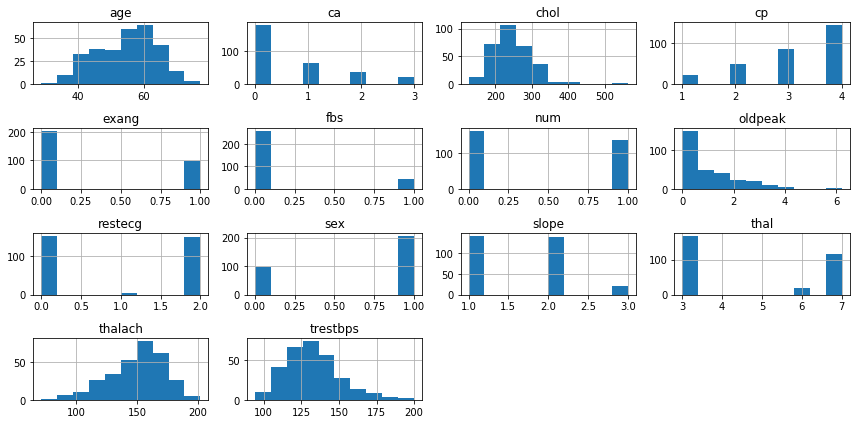

In [11]:
# plotando histograma para todas as variáveis.
df.hist(figsize = (12,6));
plt.tight_layout()

> A distribuição das variáveis parece correta, e estão em uma escala aceitável, por isso não é necessário retirar valores ou fazer mudanças no DataSet. Vamos agora olhar rapidamente para como está o quadro no Brasil. Essa são as primeiras entradas do nosso conjunto de dados.

In [12]:
# Dataset relacionado ao Brasil (primeiras entradas)
df_brasil.head()

,mortes_doencas_cardio
ano,
2017-01-01,383.961
2016-01-01,362.091
2015-01-01,349.584
2014-01-01,340.284
2013-01-01,339.672


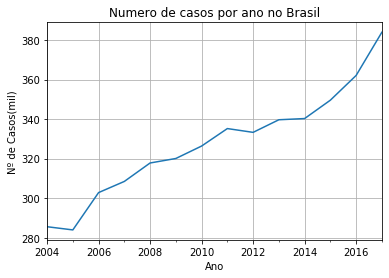

In [13]:
# Plotando um gráfico de linha sobre os casos no Brasil
fig, ax = plt.subplots()
df_brasil['mortes_doencas_cardio'].plot(kind = 'line', ax=ax, grid = True)
ax.set_xlabel('Ano')
ax.set_ylabel('Nº de Casos(mil)')
ax.set_title('Numero de casos por ano no Brasil');

>Podemos observar que segundo o gráfico os casos de morte por doença cardiovascular no Brasil **só aumenta** com o passar dos anos. Agora olhando novamente para o quadro geral vamos analisar o numero de mortes, as classificando pelo sexo.

Text(0, 0.5, 'Nº de pacientes')

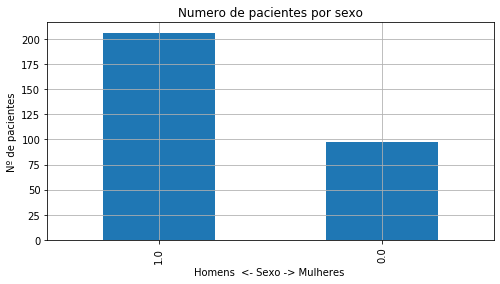

In [14]:
# Plotando gráfico de barras sobre a quantiadade de individuos de cada sexo
fig, ax = plt.subplots(figsize=(8,4))

df.sex.value_counts().plot(kind = 'bar', ax=ax, grid = True)
ax.set_title("Numero de pacientes por sexo")
ax.set_xlabel("Homens  <- Sexo -> Mulheres ")
ax.set_ylabel("Nº de pacientes")

In [15]:
# Agrupando o numero de casos por sexo.
df.groupby(['sex']).num.value_counts()

sex  num
0.0  0       72
     1       25
1.0  1      114
     0       92
Name: num, dtype: int64

> Podemos observar pelp gráfico de barras que existe uma predominancia de homens em nosso conjunto de dados com cerca de 206 dos 303 pacientes, logo podemos lançar a hipótese de que existem mais casos de morte entre os homens por doenças cardíacas.

> Nossa hipótese se confirma quando utilizamos o método `groupby()` que agrupa para nós o numero de casos em relação a cada sexo. Podemos observar que entre os homens cerca de 44% (92), morreram de doenças relacionadas o coração enquanto que nas mulheres a porcentagem é menor, cerca de 25% (25). Isso nos indica que existe uma possibilidade maior de ocorrer uma fatalidade se o individuo for do sexo masculino.

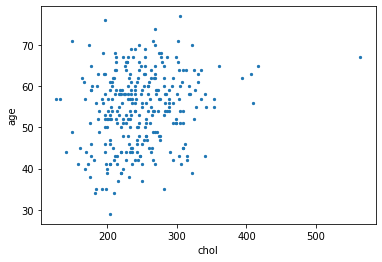

In [16]:
# plotando o gráfico de pontos para as variaveis chol e age
fig, ax = plt.subplots()

df.plot.scatter(x = 'chol', y = 'age', ax=ax, s=5);

In [17]:
# verificando a media de idade das pessoas que possum doença
df.groupby(['num']).age.mean()

num
0    52.585366
1    56.625899
Name: age, dtype: float64

In [18]:
# verificando a media de colesterol nas pessoas com doença.
df.groupby(['num']).chol.mean()

num
0    242.640244
1    251.474820
Name: chol, dtype: float64

> Com o gráfico de pontos podemos observar que existe um índice de colesterol seríco maior em pessoas com 50 anos ou mais. 

>Ja no segundo trecho de codigo podemos observar a média de idade das pessoas que morream de doeças cardiovasculares que é cerca de 56 anos, enquanto que as que não sofrem é de 52 anos. O que nos mostra que a idade também é fator determinante para a ocorrencia da fatalidade, quanto mais velho, maior as probabilidades.

> Ja no terceiro trecho de código podemos observar a média de acido sérico nas pessoas que tiverama a fatalidade que é de 251 mg, enquanto que a media dos pacientes sem fatalidade é de 242 mg. Isso nos mostra que esse é um fator também determinante para definir a aparição de um problema cardiovascular.

> Como observamos no gráfico de ponto que existe uma combinação perfeita entre os pacientes desse Dataset, com idades avançadas acima da media de 56 anos e acima da média de colesterol sérico de 251 mg para a aparição de fatalidades.





In [19]:
corr = df[['age','sex','chol','thalach','num','oldpeak','exang','slope']].corr() 
display(corr)

,age,sex,chol,thalach,num,oldpeak,exang,slope
age,1.000000,-0.097542,0.208950,-0.393806,0.223120,0.203805,0.091661,0.161770
sex,-0.097542,1.000000,-0.199915,-0.048663,0.276816,0.102173,0.146201,0.037533
chol,0.208950,-0.199915,1.000000,-0.003432,0.085164,0.046564,0.061310,-0.004062
thalach,-0.393806,-0.048663,-0.003432,1.000000,-0.417167,-0.343085,-0.378103,-0.385601
num,0.223120,0.276816,0.085164,-0.417167,1.000000,0.424510,0.431894,0.339213
oldpeak,0.203805,0.102173,0.046564,-0.343085,0.424510,1.000000,0.288223,0.577537
exang,0.091661,0.146201,0.061310,-0.378103,0.431894,0.288223,1.000000,0.257748
slope,0.161770,0.037533,-0.004062,-0.385601,0.339213,0.577537,0.257748,1.000000


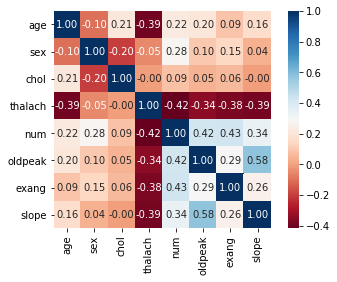

In [20]:
 #utilizando a matriz gerada acima vamos plotar um heatmap.
 sea.heatmap(corr,cmap='RdBu', fmt='.2f', square='true', linecolor='white', annot=True);

> Temos uma relação importante aqui porem obvia entre as variaveis talach e num, a primeira sendo a frequencia maxima atingida e a segunda se houve doença/fatalidade. Essa relação se deve por exemplo a ataques cardiacos no qual a frenquincia do coração é muito alta.

> Outra relação importante é se foi atinginda a angina indzudiva por exercicio(`exang`) em relação a variavel `num` que representa a presença de doenças ou não. Se a angina for atingida provavelmente o paciente possui alguma doença.

#Conclusão sobre à analise estatística

> Nesta análise de dados pudemos ver que as doenças cardiovasculares são sim um problema e está presente em nosso dia a dia sendo uma das principais causas de morte no mundo.

> Os fatores que se mostram mais determinantes segundo a análise de dados foram, a idade, sexo do paciente, angina induzida por exercicio e o indice de colesterol sérico do paciente.

> Pudemos ver que existem varios fatores que podem ser decisivos para que haja a aparição de uma doença cardiovascular, sendo destacados os do parágrafo anterior podemos concluir que homens de idade mais avaçada, proximos ou na terceira idade são as principais vitimas de  doenças cardiovasculares ao redor do mundo. Sendo assim os pacientes que apresentam essa caracteristica de idade avançada conjunto ao alto nivel de colesterol sérico e angina devem ser tratados com prioridade na triagem de um ponto de atendimento. Assim como as pesquisas para prevenção dessas doenças devem ser voltadas a esse publico.

> Para concluir pode-se realizar uma análise mais aprofundada sobre esse caso usando modelos de machine learning que possam através de alguns parametros traçar perfis de individuos com alta probabilidade de possuir doenças e auxilar na triagem de hospitais



# Criando o modelo de Machine Learning

> Nesta etapa iremos realizar a criação do modelo de aprendizado de maquina que terá como objetivo prever se um determinado paciente possue doenças cardiovasculares ou não. Para isso iremos optar pelo **modelo de regressão logistica**.

In [0]:
# importando bibliotecas necessárias para o modelo

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

> Acima importamos todas as bibliotecas necessárias para construção e análise do modelo. Logo abaixo iremos separar nossa target feature(Variável alvo) que é nossa variável dependente do resto das variáveis que irão intereferir na previsão do nosso modelo (variáveis independentes). Em seguida iremos criar e treinar o modelo. 

In [26]:
#Separando os dataFrames de teste e treino
X = df.drop('num', axis=1)
Y = df.num
X_train, X_test, Y_train, Y_test = train_test_split(X,Y)

# criando o modelo
mrl = LogisticRegression(C=0.01)

#treinando o modelo
mrl.fit(X_train,Y_train)

LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [34]:
# previsão
y_pred = mrl.predict(X_test)

# probabilidade de cada previsão
y_prob = mrl.predict_proba(X_test)

print('Previsão 5 primeiras entradas:\n{} '.format(y_pred[:5]))
print('Probabilidade 5 primeiras entradas:\n{} '.format(y_prob[:5]))

Previsão 5 primeiras entradas:
[1 1 1 0 1] 
Probabilidade 5 primeiras entradas:
[[0.27843307 0.72156693]
 [0.08155236 0.91844764]
 [0.31621227 0.68378773]
 [0.86656218 0.13343782]
 [0.09558666 0.90441334]] 


> Acima podemos ver a previsão do modelo para as 5 primeiras entradas do dataset, com 1 sendo valor positivo para doença e 0 valor negativo para doença. Logo a baixo temos a esquerda a probabilidade de ser 0 e a direita de ser 1 para cada uma das previsões calculadas anteriormente.

In [29]:
# Dados sobre o desempenho do modelo
print(classification_report(Y_test, y_pred))

              precision    recall  f1-score   support

           0       0.77      0.87      0.82        39
           1       0.84      0.73      0.78        37

    accuracy                           0.80        76
   macro avg       0.81      0.80      0.80        76
weighted avg       0.81      0.80      0.80        76



> Aqui acima temos os dados sobre o desempenho do nosso modelo:
* `precision` diz respeito a quantidade de casos positivos contados corretamente em relação ao total de casos positivos indicados pelo modelo.
* `reacall` diz respeito a quantidade de casos positivos contados corretamente pelo modelo em relação ao total real de casos positivos.
* `f1-score` esse representa a média harmonica entre `precision` e `recall`, sendo 0 o pior valor e 1 o melhor.
* `accuracy` mostra a quantidade de previsões corretas em relação ao total.
* 0 diz respeito as casos negativos
* 1 diz respeito aos casos positivos

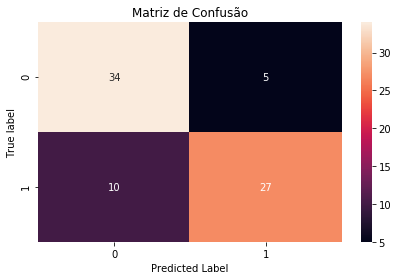

In [30]:
# Plotando o heatmap
fig, ax = plt.subplots()
sea.heatmap(confusion_matrix(Y_test, y_pred), annot = True, ax=ax)
ax.set_title("Matriz de Confusão")

ax.set_ylabel("True label")
ax.set_xlabel("Predicted Label")

plt.tight_layout()

>Analisando o nosso heatmap acima podemos observar o desempenho do nosso modelo
* **Primeiro Quadrante:** Temos o numero de casos negativos que realmente eram negativos, ou seja, previsões negativas corretas
* **Segundo Quandrante:** Temos os valores classificados como falso negativos, foram previstos como negativos mas que na realiadade são positivos.
* **Terceiro Quadrante:** Temos os valores classificados como negativos, porem que na verdade são positivos reais
* **Quarto Quadrante:** Temos os valores classificados como positivos e que realmente são positivos 

# Conclusão sobre o modelo
> Pudemos observar que o modelo é de certa fora efetivo com uma acurácia de 80%, ou seja, a cada 10 casos ele indica corretamente 8 casos. Dessa maneira o modelo poderia ser utilizado para auxiliar profissionais da saúde em diagnostícar doenças cardiovasculates em pacientes, como no modelo abaixo, no qual o paciente foi diagnosticado positivamente.

In [38]:
import numpy as np
Joana = np.array([56, 1, 3.0, 145,250.0, 0.0, 2.0, 130.0, 1.0, 2.5, 2.0, 0.0, 6.0]).reshape((1, -1))
print("Joana:\t{}".format(mrl.predict(Joana)[0]))

Joana:	1
